<a href="https://colab.research.google.com/github/Ahnjihye/Data_Analysis/blob/master/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 그래프 폰트 설정  --> 런타임 다시 시작


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [6]:
from google.colab import files
uploaded = files.upload()        

Saving seoul_bike_20191001_07.csv to seoul_bike_20191001_07.csv


In [7]:
import csv

f = open('seoul_bike_20191001_07.csv', encoding ='utf8')
data = csv.reader(f)
next(data)
data = list(data)

### 1. 따릉이는 어떤 시간에 많이 탈까?

In [9]:
ride = [0 for i in range(24)]

for row in data : 
    ride[int(row[1][-5:-3])] += int(row[2])
print(ride)

[10171902, 7845298, 5370840, 3314810, 2107605, 1928787, 3115210, 7458413, 12163349, 8573700, 7595496, 8538941, 9517960, 10675017, 12226603, 13380450, 15246090, 18840948, 22138939, 18282686, 17302339, 17152975, 15079808, 11432293]


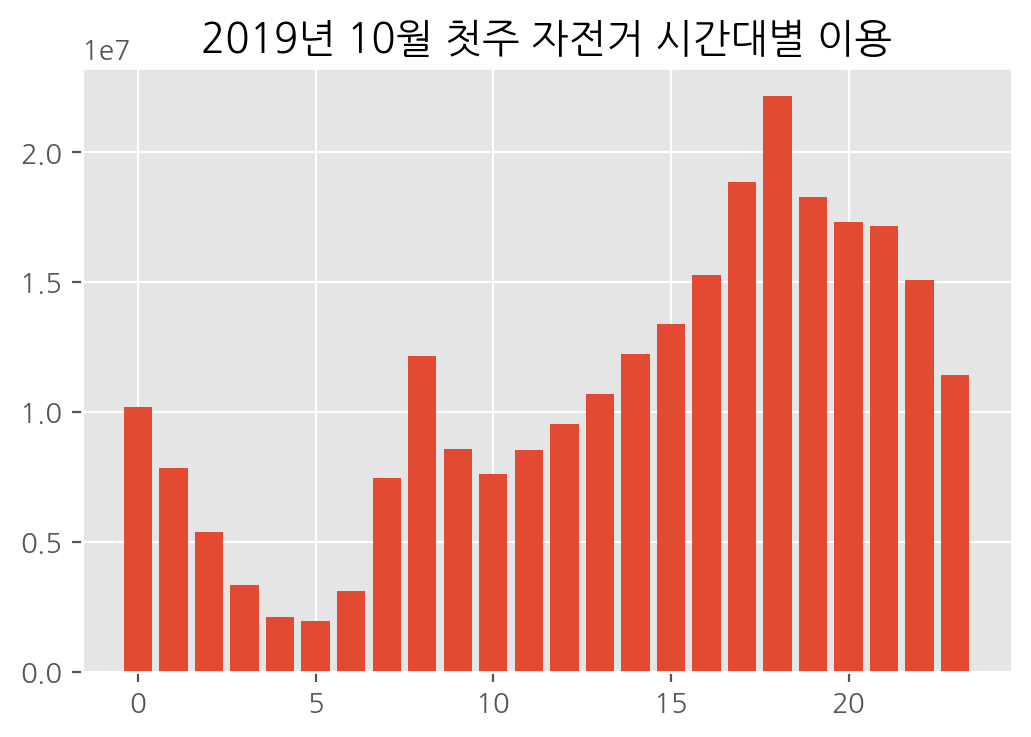

In [12]:
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.title('2019년 10월 첫주 자전거 시간대별 이용')
plt.bar(range(24), ride)
plt.show()

### 2. 따릉이는 어떤 날에 가장 많이 탈까?

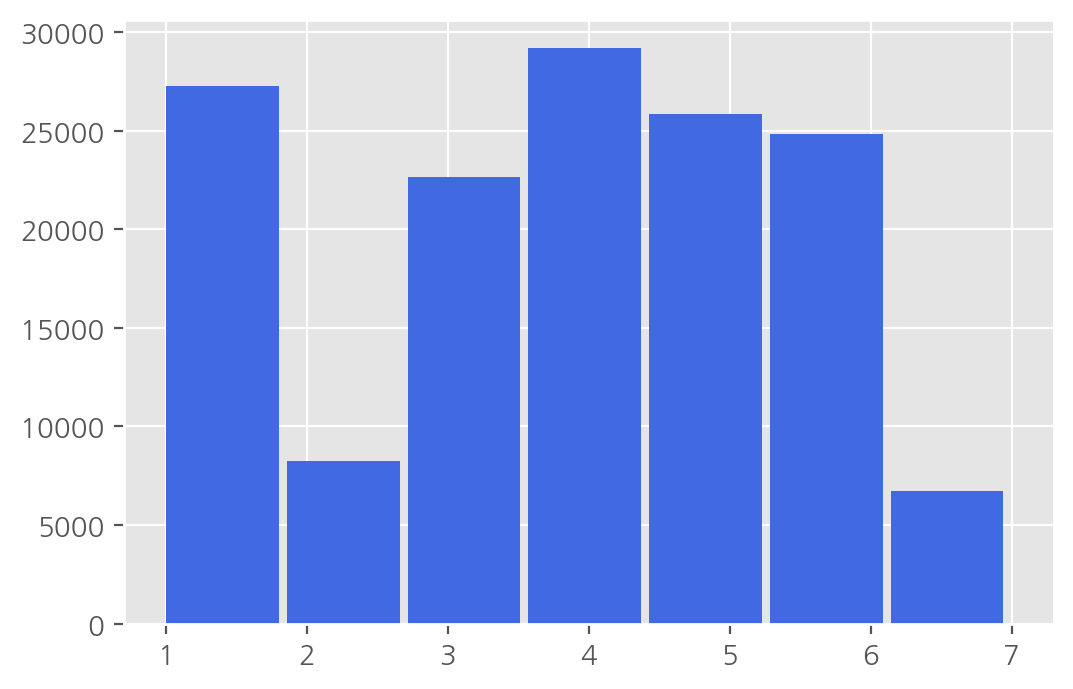

In [25]:
day =[]     # 일자만 저장하는 리스트
for row in data : 
    day.append(int(row[1][8:10]))

# 히스토그램
plt.figure(dpi=100)
plt.hist(day, bins =7, width=0.8, color = 'royalblue')
plt.show()

In [31]:
import datetime

# 0 = 월, 1 = 화, 2 = 수, 3 = 목, 4 = 금, 5 = 토, 6 = 일
print(datetime.date(2019, 10, 1).weekday())

1


### 2. 공공자전거 1회 이용시 이동거리는 얼마나 될까?

In [13]:
#[0] 0~1km, [1] 1~2km, [2] 2~3km ... [10] 10km 이상
distance = [0 for i in range(11)]

for row in data : 
    #row[-1]은 이용거리(m), row[-1]을 1000으로 나눈 몫이 distance 리스트의 인덱스가 됨
    idx = int(float(row[-1])//1000)
    if idx < 10 : 
        distance[idx] += 1 
    else : 
        distance[10] += 1
print(distance)

[26386, 34821, 22185, 13794, 9664, 7041, 5477, 4386, 3590, 2766, 14652]


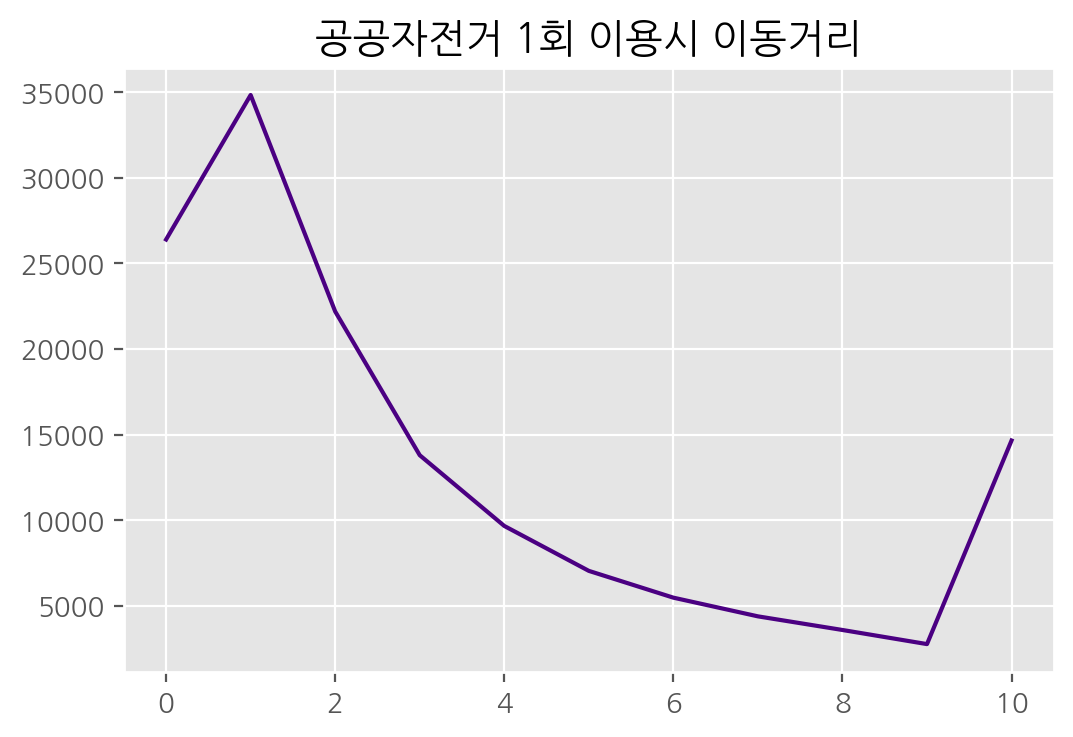

In [15]:
plt.figure(dpi=100)
plt.title('공공자전거 1회 이용시 이동거리')
plt.plot(range(11), distance, color = 'indigo')
plt.show()

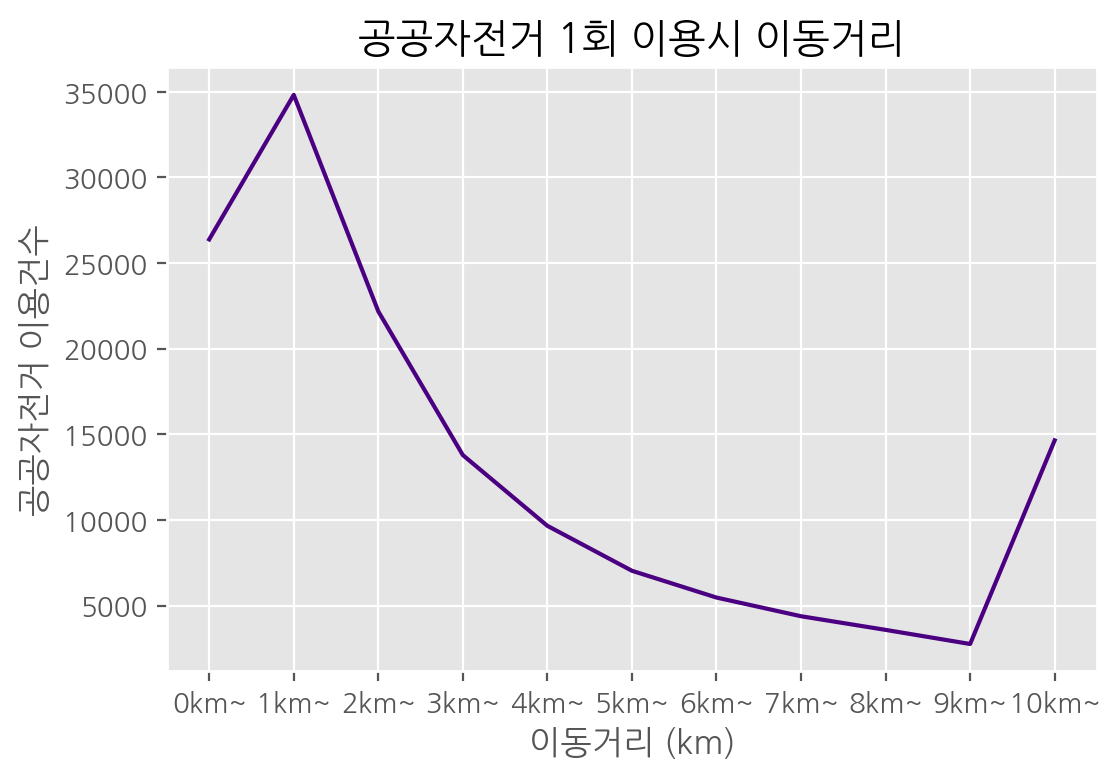

In [18]:
distance_title = []
for i in range(len(distance)) : 
    distance_title.append(str(i)+'km~')

plt.figure(dpi=100)
plt.title('공공자전거 1회 이용시 이동거리')
plt.plot(distance_title, distance, color = 'indigo')
plt.xlabel('이동거리 (km)')
plt.ylabel('공공자전거 이용건수')
plt.show()

### 3. 가장 많이 찾는 대여소는 어디일까?

In [19]:
#딕셔너리에 (대여소이름, 대여횟수) 쌍을 저장
rent = {}

for row in data :
    if row[3] not in rent.keys() : 
        rent[row[3]] = 1
    else :
        rent[row[3]] += 1

import operator 
rent5 = sorted(rent.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(rent5)

[('봉림교 교통섬', 1626), ('고속터미널역 8-1번, 8-2번 출구 사이', 1593), ('신대방역 2번 출구', 1011), ('동방1교', 1004), ('한신16차아파트 119동 앞', 858)]


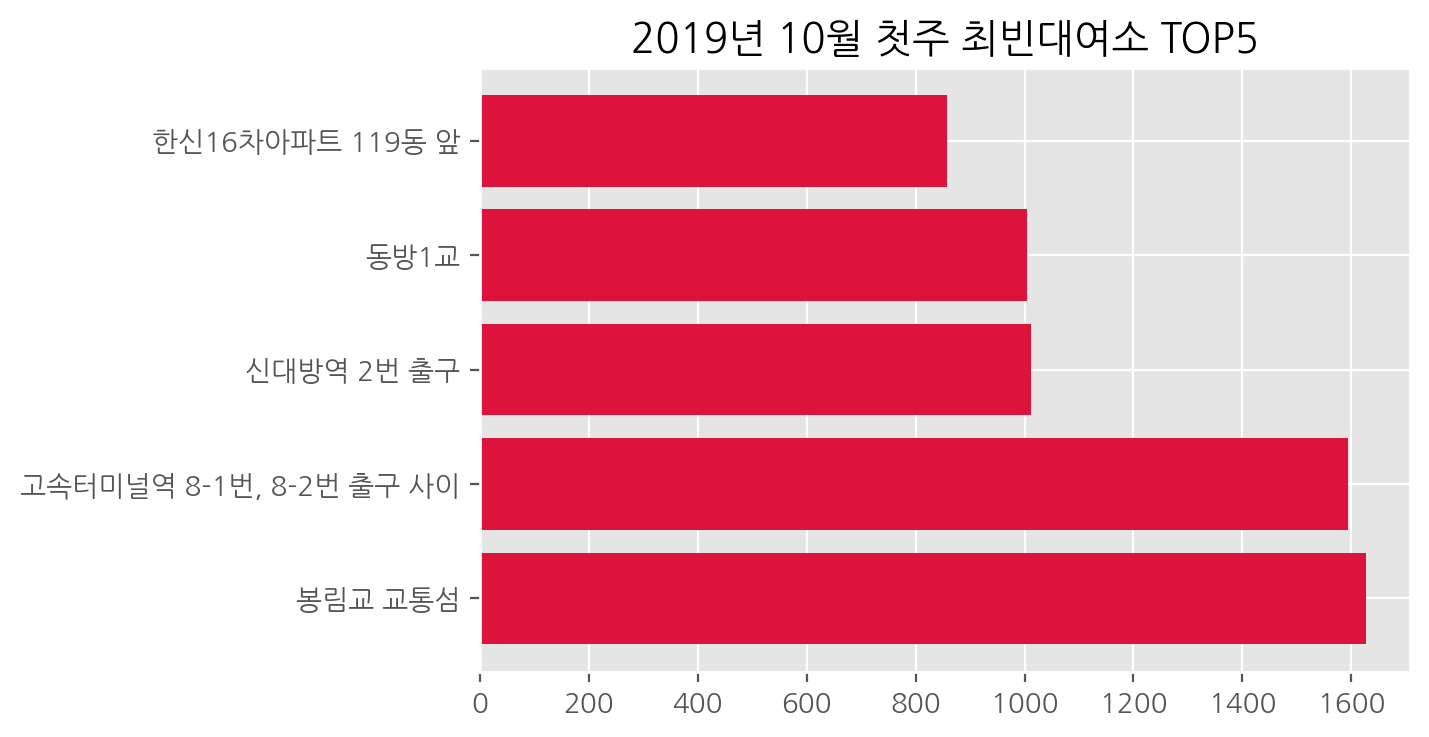

In [22]:
#rent5의 대여소명을 rent_name에 저장하고, 횟수를 rent_cnt에 저장해 시각화에 사용
rent_name = [c[0] for c in rent5]
rent_cnt = [c[1] for c in rent5]

plt.figure(dpi=100)
plt.title('2019년 10월 첫주 최빈대여소 TOP5')
plt.barh(rent_name, rent_cnt, color = 'crimson')
plt.show()